In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import geopandas as gpd
import warnings
from matplotlib import cm
from statsmodels.sandbox.regression.predstd import wls_prediction_std
import statsmodels.api as sm
# import weighted
import seaborn as sns
import scipy.stats as stats
import pylab
from graphviz import Digraph
import os
# import jenkspy
from IPython.display import Image

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
warnings.filterwarnings("ignore")

In [26]:
ipcc = False

if ipcc == True:
    df = pd.read_csv('../data/IPCC.csv')
else:
    df = pd.read_csv('../data/Country_Counts/country_counts_All_AllStudies_observations.csv')
    #df = pd.read_csv('../data/Country_Counts/country_counts_All_PR_observations.csv')


In [39]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
world.crs = {'init' :'epsg:4326'}
world = world[(world.name!='Antarctica')]
world = world.to_crs(crs='+proj=robin')

# help(world.to_crs)

In [40]:
def plt_map(data, title='None', ax=None, cmap='Blues'):

    world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
    world.crs = {'init' :'epsg:4326'}
    world = world[(world.name!="Antarctica")]
    world = world.to_crs("+proj=robin")
    
    world = pd.merge(world, data, left_on='iso_a3', right_on='ISO', how='outer')

    nodata = world.loc[world['Count'].isnull()]
    isdata = world.loc[world['Count'].notnull()]
    isdata['Count'] = np.log(isdata['Count'])

    nodata.plot(column='Count', 
                ax=ax, 
                color='k', 
                alpha=0.1)
        
    cax = isdata.plot(column='Count', 
                ax=ax, 
                cmap=cmap, 
                alpha=1., 
                edgecolor='k', 
                linewidth=.3)
        
    ax.grid(alpha=0.0)

    plt.tick_params(
        axis='both',          
        which='both',      
        bottom='off',      
        top='off',         
        labelbottom='off') 

    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.spines['bottom'].set_visible(False)

#     ax.set_title(title, fontsize=24)
        
    return ax

    
def colorbar_cax(fig, axes=[None], ticks=[None], ticklabels=[None], cmap='Blues'):
    """
    Plots color bar
    params:
        fig
    return:
        cbar object
    """
    
    cax = fig.add_axes(axes)
    vmin, vmax = -1, 1
    sm = plt.cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin=vmin, vmax=vmax))
    sm._A = []  # fake up the array of the scalar mappable.
    cbar = fig.colorbar(sm, cax=cax)

    return cbar

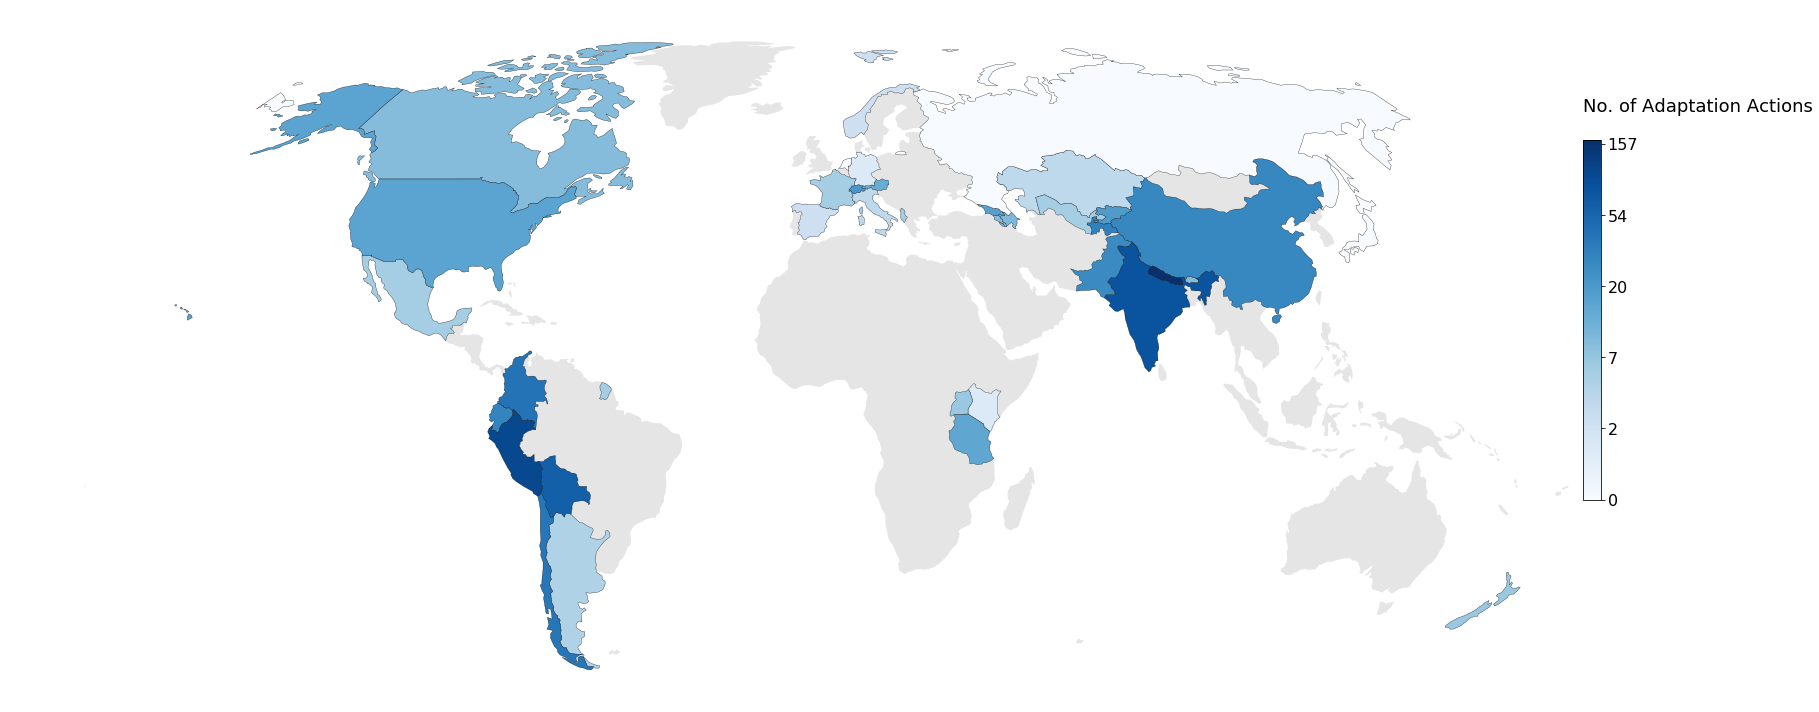

In [58]:
fig, ax = plt.subplots(figsize=[25, 10])
cax = fig.add_axes([0.92, 0.3, 0.01, 0.5])

if ipcc:
    cmap = 'Reds'
    plt_map(df, title='', 
            cmap=cmap, ax=ax)
    lgnd_text = 'No. of Studies Reporting\nConstraints or Limits'

    sm = plt.cm.ScalarMappable(cmap=cmap, 
                               norm=plt.Normalize(vmin=df['Count'].min(), 
                                                  vmax=df['Count'].max()))
    sm._A = []  # fake up the array of the scalar mappable.
    labels = [5, 10, 15, 20]
    cbar = fig.colorbar(sm, cax=cax, ticks = labels)
    
    
    
    
    
else:
    cmap = 'Blues'
    plt_map(df, title='Figure 2. No. Discrete Adaptations by Country', 
            cmap=cmap, ax=ax)
    lgnd_text = 'No. of Adaptation Actions'
    labels = [0, 2, 7, 20, 54, 157]
    sm = plt.cm.ScalarMappable(cmap=cmap, 
                               norm=plt.Normalize(vmin=np.log(df['Count']).min(), 
                                                  vmax=np.log(df['Count']).max()))
    sm._A = []  # fake up the array of the scalar mappable.
    cbar = fig.colorbar(sm, cax=cax)

    
labels = [str(int(l)) for l in labels]
cbar.ax.set_yticklabels(labels, fontsize=16)    
fig.text(.92, .84, lgnd_text, fontsize=18)



# Add subplot
# cax = fig.add_axes([0., 0.1, 0.2, 0.3])
# tmp = df.sort_values('Count', ascending=False).iloc[:10, :]
# sns.barplot(x='Count', 
#             y='ISO', 
#             data=tmp, 
# #             color='grey', 
#             palette=sns.color_palette('Purples_r', 20),
#             ax=cax)

# # Turn off top and right spines
# cax.spines['right'].set_visible(False)
# cax.spines['top'].set_visible(False)

# # Labels
# cax.set_title('Top Ten Countries\n', fontsize=18)
# cax.set_ylabel('')
# cax.set_xlabel('\nNo. Adaptations', fontsize=17)
# for tick in cax.xaxis.get_major_ticks():
#     tick.label.set_fontsize(16) 
# for tick in cax.yaxis.get_major_ticks():
#     tick.label.set_fontsize(16) 

# for label in cax.get_yticklabels():
#     label.set_horizontalalignment('left')

# yax = cax.get_yaxis()
# yax.set_tick_params(pad=40)  # Moves plot over to accomodate yaxis left alignment


fig.tight_layout()
plt.savefig('Figures/Map_Discrete_Adaptations.png', bbox_inches='tight', dpi=1000)
plt.show()